In [177]:
%reset

In [178]:
# Importing the libraries
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle

![Zadatak](assignment.png "Zadatak")

#### **Pomaci središnjih katova:**
${{{d^2}{x_i}} \over d{t^2}}= {k({x_{i-1}} - 2{x_i} + {x_{i+1}}) + {F_f}(\dot{x}_i)}$

#### **Prizemlje zgrade vezano na pobudu tla (amplituda i frekvencija potresa):**
${{{d^2}{x_1}} \over d{t^2}}= {k(- 2{x_1} + {x_2}) + {F_f}(\dot{x}_1) + Asin(\omega t)}$
- $Asin(\omega t)$ -> Podrhtavanje tla

#### **Pomak zadnjeg kata:**
${{{d^2}{x_N}} \over d{t^2}}= {k({x_{N-1}} - 2{x_N}) + {F_f}(\dot{x}_N)}$

#### **${F_f}(\dot{x})$ trenje između katova je definirano:**
$ {F_f}(\dot{x}) =
    \begin{cases}
    -F_0    & \quad \dot{x} > 0\\
    +F_0    & \quad \dot{x} < 0\\
    kx     & \quad \dot{x} = 0, kx \leq F_0\\
    {F_0 x} \over |x|     & \quad \dot{x} = 0, kx \geq F_0
    \end{cases}
$

Approximate Energy of Earthquake per Magnitude:

![Energy per Magnitude](EnergyPerMagnitude.png "Energy per Magnitude")

----

#### Literature:
1. [Learning Differential Equations by Exploring Earthquake Induced Structural Vibrations: A Case Study*](https://www.ijee.ie/articles/Vol15-6/ijee1107.pdf)

In [179]:
# Parameters
k = 0.1 # N/m; Spring constant
F0 = 5*0.0000001 # Constant
A = 0.01 # m; Amplitude of a floor
omega = 0.2 # rad/s; Frequency of a floor

# Friction between floors definition
def F_f(v, x): # v = velocity = derivation of x
    if v > 0:
        return -F0
    elif v < 0:
        return F0
    elif v == 0 and k*x <= F0:
        return k*x
    elif v == 0 and k*x > F0:
        return ((F0)*x)/np.abs(x)

# Frequency of the earthquake
def potres(t):
    # print(t)
    if t <= 5:
        return A*np.sin(0.1*t)
    elif t <= 10:
        return A*np.sin(0.3*t)
    elif t <= 15:
        return A*np.sin(0.45*t)
    elif t <= 20:
        return A*np.sin(0.55*t)
    elif t <= 25:
        return A*np.sin(0.63*t)
    else:
        return A*np.sin(0.69*t)

In [180]:
# Function that calculates the right sides of the differential equations
def D(X, t):
    # X1, X2, X3, X4, V1, V2, V3, V4 = X
    return np.array([X[4],
                    X[5],
                    X[6],
                    X[7],
                    k*(-2*X[0] + X[1]) + F_f(X[4], X[0]) + A*np.sin(omega*t), # + potres(t),    # Ground floor
                    k*(X[0] - 2*X[1] + X[2]) + F_f(X[5], X[1]),                                 # First floor      
                    k*(X[1] - 2*X[2] + X[3]) + F_f(X[6], X[2]),                                 # Second floor       
                    k*(X[2] - 2*X[2]) + F_f(X[7], X[3])])                                       # Third floor

# Initial state
X0 = np.array([0, 0, 0, 0, 0, 0, 0, 0])

# Time interval
t_stop = 30 # Mag. 5-6 earthquake lasts up to 30 seconds
nt = t_stop*30 # Number of time steps

T = np.linspace(0, t_stop, nt)

# Integration
X = odeint(D, X0, T)

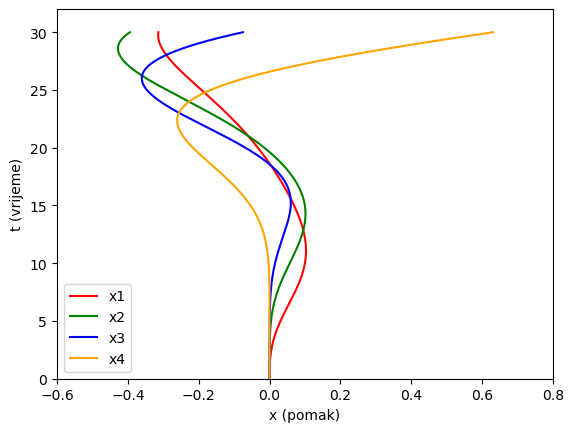

In [181]:
# Graphs - x
min_x = np.around(min(min(X[:,0]), min(X[:,1]), min(X[:,2]), min(X[:,3]))-0.15, decimals=1)
max_x = np.around(max(max(X[:,0]), max(X[:,1]), max(X[:,2]), max(X[:,3]))+0.15, decimals=1)
plt.xlim(min_x, max_x)
plt.ylim(0, 32)
plt.plot(X[:, 0], T, label='x1', color='red')
plt.plot(X[:, 1], T, label='x2', color='green')
plt.plot(X[:, 2], T, label='x3', color='blue')
plt.plot(X[:, 3], T, label='x4', color='orange')
plt.xlabel('x (pomak)')
plt.ylabel('t (vrijeme)')
plt.legend()

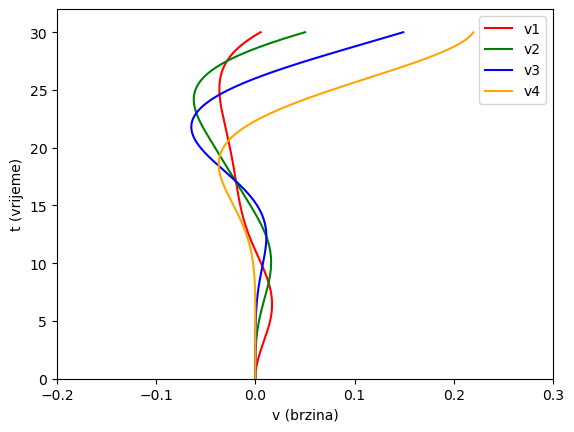

In [182]:
# Graphs - v
plt.figure()
min_v = np.around(min(min(X[:,4]), min(X[:,5]), min(X[:,6]), min(X[:,7]))-0.1, decimals=1)
max_v = np.around(max(max(X[:,4]), max(X[:,5]), max(X[:,6]), max(X[:,7]))+0.1, decimals=1)
plt.xlim(min_v, max_v)
plt.ylim(0, 32)
plt.plot(X[:, 4], T, label='v1', color='red')
plt.plot(X[:, 5], T, label='v2', color='green')
plt.plot(X[:, 6], T, label='v3', color='blue')
plt.plot(X[:, 7], T, label='v4', color='orange')
plt.xlabel('v (brzina)')
plt.ylabel('t (vrijeme)')
plt.legend()

In [ ]:
# Animation

fig, ax = plt.subplots()
def frames(i):
    plt.clf()
    plt.xlim(0, 10)
    plt.ylim(-1, 32)
    ax = plt.gca()
    ax.add_patch(Rectangle((0, -1), 10, 1, color='green'))
    ax.add_patch(Rectangle((2.5 + X[i,0], 0), 5, 6, color='red', label='Floor 1'))
    ax.add_patch(Rectangle((2.5 + X[i,1], 6), 5, 6, color='green', label='Floor 2'))
    ax.add_patch(Rectangle((2.5 + X[i,2], 12), 5, 6, color='blue', label='Floor 3'))
    ax.add_patch(Rectangle((2.5 + X[i,3], 18), 5, 6, color='orange', label='Floor 4'))

animation = FuncAnimation(fig, frames, frames=nt) # Create an animation with a total of nt frames
animation.save('Animacija.avi', fps=(nt)/t_stop) # Save the animation as a video file (avi)